In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
0,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,25856.0,17.0,0.88,1.0,40.0,10833.333330,160.0,262.10,17.0,0
1,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,11041.3,21.8,0.90,0.9,20.0,6250.000000,24.0,50.29,18.0,1
2,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,1006.0,6.0,1.00,0.0,26.0,2413.666667,70.0,126.52,27.0,0
3,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,3398.0,31.0,0.96,0.0,44.0,7666.666667,100.0,205.47,21.0,0
4,Candidate_29660,1,0,30,13,2,False,2,True,13.50,...,4110.0,11.0,0.90,2.0,48.0,4250.000000,150.0,254.51,13.0,0


In [3]:
df_if = df.drop(['Unique_ID', 'Dependent_Variable'], axis=1)

In [4]:
df_if.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,1,4,2,66,2,False,1,True,11.05,22.0,...,0.06,25856.0,17.0,0.88,1.0,40.0,10833.333330,160.0,262.10,17.0
1,1,0,19,2,0,False,0,True,29.00,81.4,...,0.50,11041.3,21.8,0.90,0.9,20.0,6250.000000,24.0,50.29,18.0
2,1,1,16,47,1,False,4,True,17.99,1.0,...,0.89,1006.0,6.0,1.00,0.0,26.0,2413.666667,70.0,126.52,27.0
3,1,1,13,1,1,True,6,True,27.50,206.0,...,0.97,3398.0,31.0,0.96,0.0,44.0,7666.666667,100.0,205.47,21.0
4,1,0,30,13,2,False,2,True,13.50,14.0,...,0.62,4110.0,11.0,0.90,2.0,48.0,4250.000000,150.0,254.51,13.0


## Anomaly detection using Isolation Forest

In [5]:
# Creating the Isolation Forest model

model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, max_features=1, 
                         bootstrap=False, n_jobs=-1, random_state=1, verbose=0, warm_start=False)

In [6]:
model.fit(df_if)

IsolationForest(contamination=0.05, max_features=1, n_jobs=-1, random_state=1)

In [7]:
anomaly_score = model.decision_function(df_if)   
predictions = model.predict(df_if)
df_if['anomaly_score'] = anomaly_score
df_if['anomaly_check'] = predictions

In [8]:
df_if

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N20,N21,N22,N23,N24,N33,N34,N35,anomaly_score,anomaly_check
0,1,4,2,66,2,False,1,True,11.05,22.0,...,17.0,0.88,1.0,40.0,10833.333330,160.00,262.10,17.0,0.033703,1
1,1,0,19,2,0,False,0,True,29.00,81.4,...,21.8,0.90,0.9,20.0,6250.000000,24.00,50.29,18.0,0.020353,1
2,1,1,16,47,1,False,4,True,17.99,1.0,...,6.0,1.00,0.0,26.0,2413.666667,70.00,126.52,27.0,0.052563,1
3,1,1,13,1,1,True,6,True,27.50,206.0,...,31.0,0.96,0.0,44.0,7666.666667,100.00,205.47,21.0,0.035945,1
4,1,0,30,13,2,False,2,True,13.50,14.0,...,11.0,0.90,2.0,48.0,4250.000000,150.00,254.51,13.0,0.062008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32271,1,1,14,41,2,False,6,True,15.50,19.0,...,7.0,1.00,0.0,18.0,7000.000000,199.98,349.07,8.0,0.041741,1
32272,1,6,10,1,2,True,2,True,32.20,42.0,...,41.0,0.63,2.0,42.0,4420.000000,40.00,87.33,19.0,0.023003,1
32273,1,1,2,4,2,False,6,True,8.99,137.0,...,28.0,0.75,0.0,18.0,6971.833333,40.00,63.59,20.0,0.041571,1
32274,1,0,0,0,0,False,0,True,15.00,81.4,...,21.8,0.90,0.9,40.0,2537.916667,24.00,41.60,17.0,0.034045,1


In [9]:
df_if_without_outliers = df_if.copy()
df_if_without_outliers.insert(0, 'Unique_ID', df['Unique_ID'])
df_if_without_outliers['label'] = df['Dependent_Variable']
df_if_without_outliers = df_if_without_outliers[df_if_without_outliers.anomaly_check != -1]
df_if_without_outliers

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N21,N22,N23,N24,N33,N34,N35,anomaly_score,anomaly_check,label
0,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,0.88,1.0,40.0,10833.333330,160.00,262.10,17.0,0.033703,1,0
1,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,0.90,0.9,20.0,6250.000000,24.00,50.29,18.0,0.020353,1,1
2,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,1.00,0.0,26.0,2413.666667,70.00,126.52,27.0,0.052563,1,0
3,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,0.96,0.0,44.0,7666.666667,100.00,205.47,21.0,0.035945,1,0
4,Candidate_29660,1,0,30,13,2,False,2,True,13.50,...,0.90,2.0,48.0,4250.000000,150.00,254.51,13.0,0.062008,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32271,Candidate_26099,1,1,14,41,2,False,6,True,15.50,...,1.00,0.0,18.0,7000.000000,199.98,349.07,8.0,0.041741,1,0
32272,Candidate_33316,1,6,10,1,2,True,2,True,32.20,...,0.63,2.0,42.0,4420.000000,40.00,87.33,19.0,0.023003,1,0
32273,Candidate_36027,1,1,2,4,2,False,6,True,8.99,...,0.75,0.0,18.0,6971.833333,40.00,63.59,20.0,0.041571,1,0
32274,Candidate_3169,1,0,0,0,0,False,0,True,15.00,...,0.90,0.9,40.0,2537.916667,24.00,41.60,17.0,0.034045,1,1


In [11]:
df_if_without_outliers.drop(['anomaly_score', 'anomaly_check'], axis=1, inplace=True)
df_if_without_outliers.to_csv('without_outliers_IF.csv', index=False)

In [12]:
print(pd.Series(predictions).value_counts())

 1    30662
-1     1614
dtype: int64


In [13]:
df_if

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N20,N21,N22,N23,N24,N33,N34,N35,anomaly_score,anomaly_check
0,1,4,2,66,2,False,1,True,11.05,22.0,...,17.0,0.88,1.0,40.0,10833.333330,160.00,262.10,17.0,0.033703,1
1,1,0,19,2,0,False,0,True,29.00,81.4,...,21.8,0.90,0.9,20.0,6250.000000,24.00,50.29,18.0,0.020353,1
2,1,1,16,47,1,False,4,True,17.99,1.0,...,6.0,1.00,0.0,26.0,2413.666667,70.00,126.52,27.0,0.052563,1
3,1,1,13,1,1,True,6,True,27.50,206.0,...,31.0,0.96,0.0,44.0,7666.666667,100.00,205.47,21.0,0.035945,1
4,1,0,30,13,2,False,2,True,13.50,14.0,...,11.0,0.90,2.0,48.0,4250.000000,150.00,254.51,13.0,0.062008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32271,1,1,14,41,2,False,6,True,15.50,19.0,...,7.0,1.00,0.0,18.0,7000.000000,199.98,349.07,8.0,0.041741,1
32272,1,6,10,1,2,True,2,True,32.20,42.0,...,41.0,0.63,2.0,42.0,4420.000000,40.00,87.33,19.0,0.023003,1
32273,1,1,2,4,2,False,6,True,8.99,137.0,...,28.0,0.75,0.0,18.0,6971.833333,40.00,63.59,20.0,0.041571,1
32274,1,0,0,0,0,False,0,True,15.00,81.4,...,21.8,0.90,0.9,40.0,2537.916667,24.00,41.60,17.0,0.034045,1


In [14]:
outliers = df_if.loc[df_if['anomaly_check']==-1]
outlier_index = list(outliers.index)

In [15]:
scaler = StandardScaler()    
df_if = scaler.fit_transform(df_if)    # Normalize the features
pca = PCA(3)    # Define the PCA model with 3 components
df_if_reduce = pca.fit_transform(df_if)

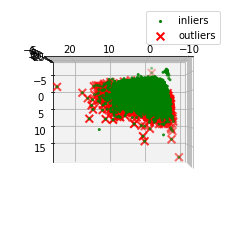

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all the data points
ax.scatter(df_if_reduce[:, 0], df_if_reduce[:, 1], zs=df_if_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Highlight the detected outliers
ax.scatter(df_if_reduce[outlier_index,0],df_if_reduce[outlier_index,1], df_if_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")

ax.view_init(180, 90)
ax.legend()
plt.show()